In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [2]:
from scipy.signal import butter, filtfilt
import IPython.display as ipd

def butter_filter(data, sr, cutoff, btype='low', order=5):
    nyq = 0.5 * sr
    normal_cutoff = np.array(cutoff) / nyq if isinstance(cutoff, (list, tuple)) else cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    return filtfilt(b, a, data)

Duration: 132.00 seconds


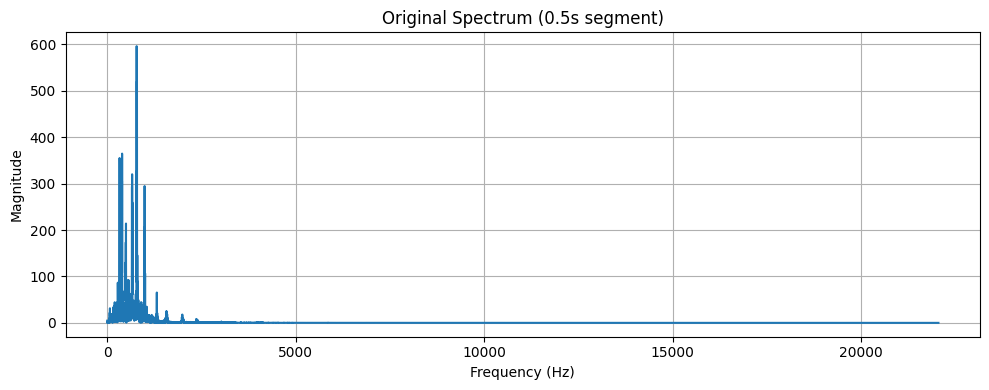

In [3]:
file_path = "data/PIANO.wav"
y, sr = librosa.load(file_path, sr=None)

duration_sec = len(y) / sr
print(f"Duration: {duration_sec:.2f} seconds")

# Use 0.5s from a valid time (e.g., start at 0.5s)
start_time = 1
end_time = start_time + 1

# Convert to sample index and clip within bounds
start_sample = int(start_time * sr)
end_sample = int(min(len(y), end_time * sr))

segment = y[start_sample:end_sample]

# Check if segment has sufficient data
if len(segment) == 0:
    raise ValueError("Segment is empty. Choose a valid start time and ensure the signal is long enough.")

# Plot spectrum
N = len(segment)
fft_vals = np.fft.rfft(segment)
frequencies = np.fft.rfftfreq(N, d=1/sr)
magnitude = np.abs(fft_vals)

plt.figure(figsize=(10, 4))
plt.plot(frequencies, magnitude)
plt.title("Original Spectrum (0.5s segment)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# Listen to original segment
ipd.Audio(segment, rate=sr)

## HIGH, LOW AND BANDSTOP FILTER

In [4]:
from scipy.io.wavfile import write
# Low-pass filter (below 1000 Hz)
low = butter_filter(segment, sr, cutoff=1000, btype='low')
ipd.display(ipd.Audio(low, rate=sr))
write("low_pass_output.wav", sr, low)  # Simpan sebagai file WAV

# High-pass filter (above 1000 Hz)
high = butter_filter(segment, sr, cutoff=1000, btype='high')
ipd.display(ipd.Audio(high, rate=sr))
write("high_pass_output.wav", sr, high)  # Simpan sebagai file WAV

# Band-stop filter (remove 500–2000 Hz)
bandstop = butter_filter(segment, sr, cutoff=[500, 2000], btype='bandstop')
ipd.display(ipd.Audio(bandstop, rate=sr))
write("bandstop_output.wav", sr, bandstop)  # Simpan sebagai file WAV

# Question:

    Bagaimana perubahan timbre-nya?
Timbre (warna suara) berubah karena filter memengaruhi komponen frekuensi dari sinyal. Setiap filter menghilangkan atau mengurangi sebagian spektrum frekuensi, yang menyebabkan suara terdengar berbeda:
•	Low-pass filter: Suara terdengar lebih lembut atau gelap (muffled) karena hanya frekuensi rendah (<1000 Hz) yang dipertahankan. Harmonik tinggi dihilangkan.
•	High-pass filter: Suara terdengar lebih tajam atau terang (bright/harsh) karena hanya frekuensi tinggi (>1000 Hz) yang lolos. Nada dasar dan harmonik rendah dihilangkan.
•	Band-stop filter: Suara kehilangan sebagian "isi" atau kedalaman di tengah frekuensi karena frekuensi antara 500–2000 Hz dibuang. Ini bisa membuat suara terdengar kosong atau aneh, tergantung konten audio.


    Harmonik mana yang hilang setelah proses penyaringan (filtering)?
Harmonik yang hilang tergantung pada jenis filter yang digunakan,
•	Low-pass filter: harmonik tinggi (frekuensi > 1000 Hz) hilang.
•	High-pass filter: harmonik rendah (frekuensi < 1000 Hz) hilang.
•	Band-stop filter:harmonik tengah (frekuensi sekitar 500-2000 Hz) hilang.

    Bagian mana yang terdengar lebih redup (muffled) atau lebih terang (brighter)?
•	bagian yang terdengar lebih redup adalah ketika kita menggunakan low-pass filter, karena hanya frekuensi rendah yang dipertahankan dan harmonik tinggi yang memberi kecerahan dihilangkan.
•	bagian yang terdengar lebih terang adalah saat menggunakan high-pass filter, karena hanya frekuensi tinggi yang lolos, membuat suara terdengar lebih tajam dan terang. 